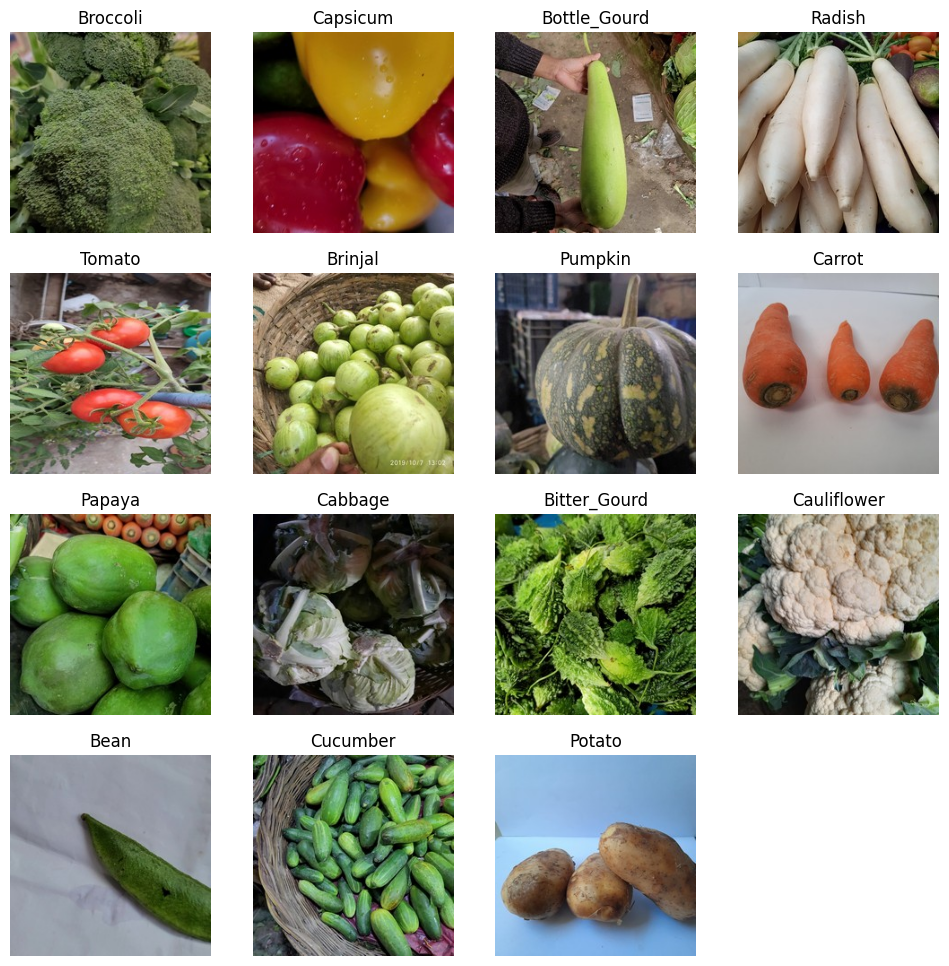

In [1]:
import os
import matplotlib.pyplot as plt
from keras.utils import load_img
import tensorflow as tf
train_path = "/kaggle/input/vegetable-image-dataset/Vegetable Images/train"
validation_path = "/kaggle/input/vegetable-image-dataset/Vegetable Images/validation"
test_path = "/kaggle/input/vegetable-image-dataset/Vegetable Images/test"

image_categories = os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/train')

def plot_images(image_categories):
  plt.figure(figsize=(12, 12))

  for i, cat in enumerate(image_categories):
    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0
    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(cat)
    plt.axis('off')

  # Add an empty subplot for the 16th position
  plt.subplot(4, 4, 16)
  plt.axis('off')

  plt.show()

plot_images(image_categories)

In [2]:
import tensorflow as tf
from keras.utils import to_categorical

# ... (previous code)

def create_datasets_from_directory(train_path, validation_path, test_path, batch_size=32):
  train_ds = tf.keras.utils.image_dataset_from_directory(
      train_path,
      label_mode='categorical',
      image_size=(256, 256),
      batch_size=batch_size,
      shuffle=True,
      seed=123
  )

  validation_ds = tf.keras.utils.image_dataset_from_directory(
      validation_path,
      label_mode='categorical',
      image_size=(256, 256),
      batch_size=batch_size,
      shuffle=True,
      seed=123
  )

  test_ds = tf.keras.utils.image_dataset_from_directory(
      test_path,
      label_mode='categorical',
      image_size=(256, 256),
      batch_size=batch_size,
      shuffle=True,
      seed=123
  )

  return train_ds, validation_ds, test_ds

def label_encoding(train_ds, validation_ds, test_ds):
  class_names = train_ds.class_names
  num_classes = len(class_names)

  # Print the mapping of class names to integers
  print("Class Name Mapping:")
  for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

  return class_names, num_classes

# Create the datasets
train_ds, validation_ds, test_ds = create_datasets_from_directory(train_path, validation_path, test_path)
#print(test_ds.class_names)
# Perform label encoding
class_names, num_classes = label_encoding(train_ds, validation_ds, test_ds)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Class Name Mapping:
0: Bean
1: Bitter_Gourd
2: Bottle_Gourd
3: Brinjal
4: Broccoli
5: Cabbage
6: Capsicum
7: Carrot
8: Cauliflower
9: Cucumber
10: Papaya
11: Potato
12: Pumpkin
13: Radish
14: Tomato


In [3]:
def resize_images(dataset):
  return dataset.map(lambda x, y: (tf.image.resize(x, (150,150)), y))

# Resize images in train_ds, validation_ds, and test_ds
train_ds = resize_images(train_ds)
validation_ds = resize_images(validation_ds)
test_ds = resize_images(test_ds)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def create_model(input_shape=(150, 150, 3), num_classes=15):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model
model = create_model()

# Display the model architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,015,375 (42.02 MB)

 Trainable params: 11,014,415 (42.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [5]:
import keras
early_stopping=keras.callbacks.EarlyStopping(patience=10)

hist=model.fit(train_ds,
              epochs=100,
               verbose=1,
               validation_data=validation_ds,
               callbacks=early_stopping
              )

Epoch 1/100


I0000 00:00:1729324216.130459      73 service.cc:145] XLA service 0x7cb2ac015480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729324216.130526      73 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/469 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.0391 - loss: 11.1668  

I0000 00:00:1729324226.803812      73 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_7', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1729324226.820411      73 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3658 - loss: 5.5020

I0000 00:00:1729324270.429927      76 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion', 16 bytes spill stores, 16 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 104ms/step - accuracy: 0.3660 - loss: 5.4957 - val_accuracy: 0.4097 - val_loss: 5.5384
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.6620 - loss: 1.1077 - val_accuracy: 0.6730 - val_loss: 1.6711
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7589 - loss: 0.7852 - val_accuracy: 0.8760 - val_loss: 0.4296
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8128 - loss: 0.6389 - val_accuracy: 0.6483 - val_loss: 2.0851
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8506 - loss: 0.5028 - val_accuracy: 0.8313 - val_loss: 0.8505
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8779 - loss: 0.4287 - val_accuracy: 0.8593 - val_loss: 0.7994
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9037 - loss: 0.3400 - val_accuracy: 0.9493 - val_loss: 0.2568
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9082 - loss: 0.3464 - val

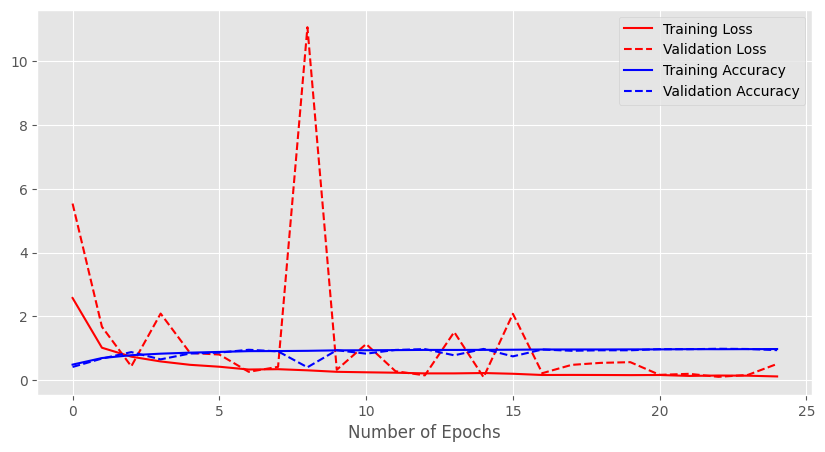

In [6]:
h=hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(h['loss'],c='red',label='Training Loss')
plt.plot(h['val_loss'],c='red',linestyle='--',label='Validation Loss')
plt.plot(h['accuracy'],c='blue',label='Training Accuracy')
plt.plot(h['val_accuracy'],c='blue',linestyle="--",label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()


In [7]:
model.evaluate(test_ds)

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9418 - loss: 0.4737


[0.5120823979377747, 0.937333345413208]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

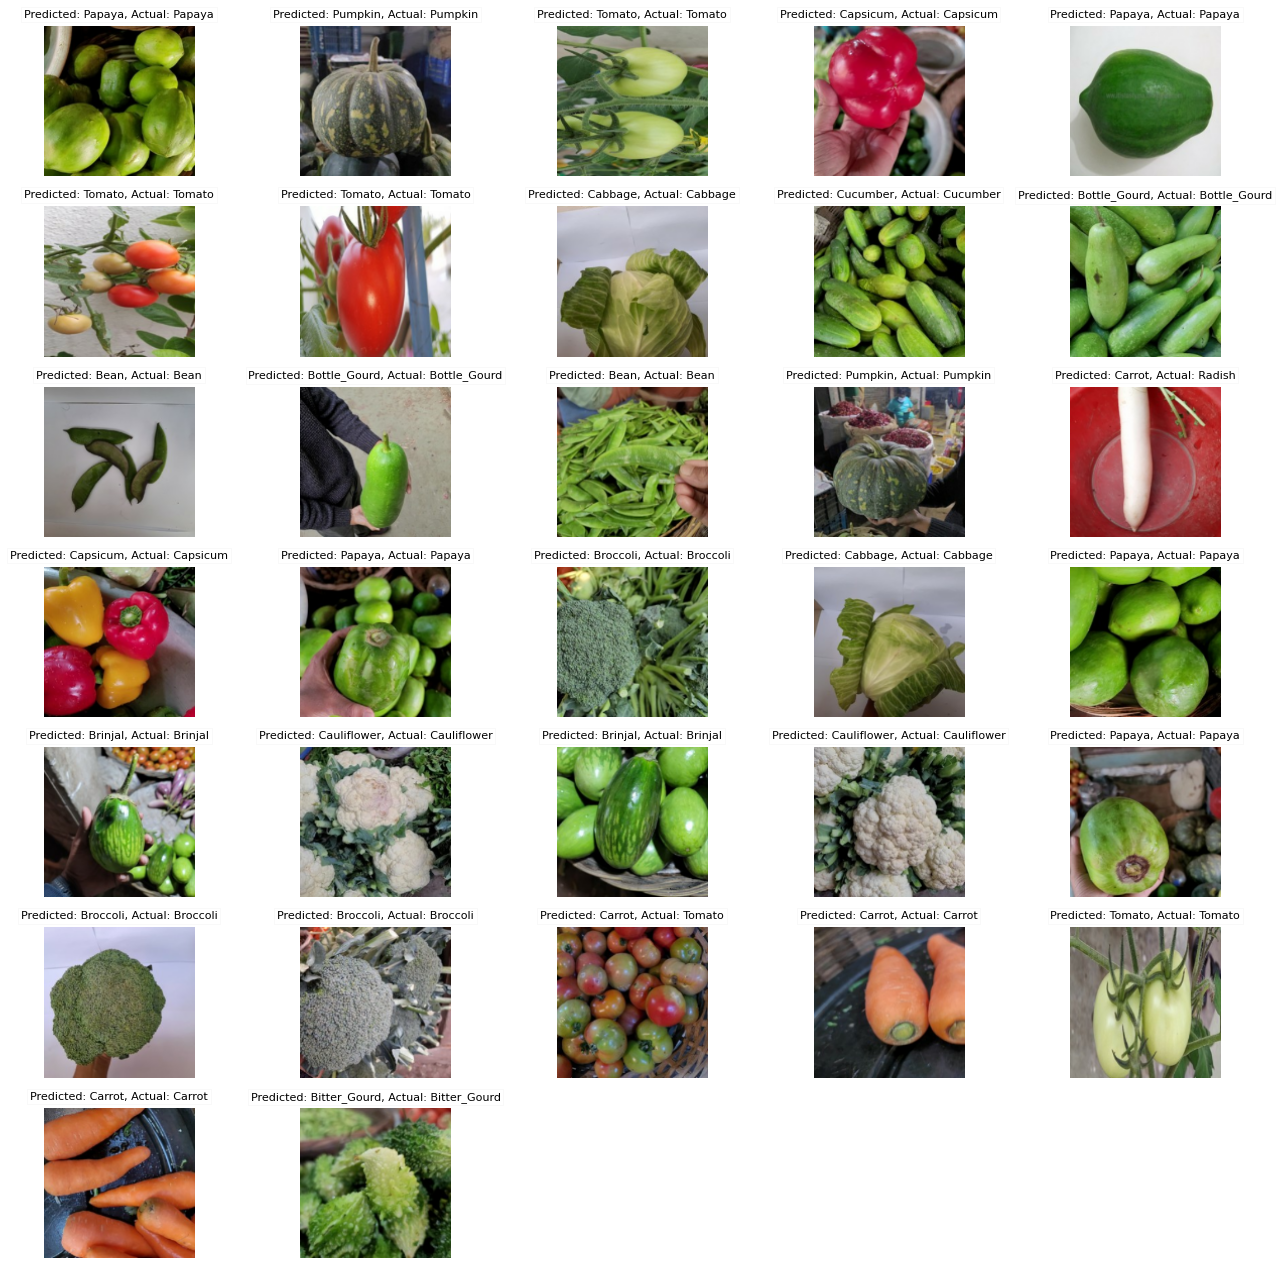

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_preds():
    plt.figure(figsize=(16,16))  # Create the figure outside the loop
    for x, y in train_ds.take(1):
        pass  # Get a batch of data
    for i in range(32):
        plt.subplot(7, 5, i+1)  # Adjusted to plot a 6x6 grid
        predicted_label = np.argmax(model.predict(np.reshape(x[i], (1, 150, 150, 3))))
        plt.imshow(x[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.title(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[np.argmax(y[i])]}",fontsize=8, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 2})
        plt.axis('off')  # Turn off axis labels for clarity

    #plt.tight_layout()  # Adjust the spacing between plots
    plt.show()  # Show the entire grid after the loop
plot_preds()

In [9]:
model.save('classifier.h5')